# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de **inadimplentes**. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

Utilizaremos uma "Árvore de Decisão".


Importando a base e fazendo as verificações iniciais de consistência:

In [1]:
import pandas as pd

data = pd.read_csv('./emp_automovel.csv')
data.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


A base se encontra completa, sem dados nulos.

Separando as variáveis explicativas e a variável alvo:

In [3]:
x = data.drop('inadimplente', axis=1)
y = data['inadimplente']

Criando um modelo com parâmetros default e usando toda a base para o treinamento. Corremos o risco de overfitting. Isso pode ser visto com o método `score`, que retorna a média de acurácia do modelo.

A acurácia é a "taxa de acertos". É a quantidade de acertos do modelo (verdadeiros positivos (TP) e verdadeiros negativos (TN)) dividido por todas as entradas (verdadeiros positivos e negativos (TP e TN) e falsos positivos e negativos (FP e FN)).

$acurácia = \frac{TP + TN}{TP + TN + FP + FN}$

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=5)
model.fit(x, y)
model.score(x, y)

1.0

A acurácia foi de 1.0, ou seja, 100%, indicando um possível overfitting. Como usamos 100% da base para o treinamento, não temos dados novos para testá-la.

### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em **dados independentes**.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos **separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste**.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais **desde o momento inicial** para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

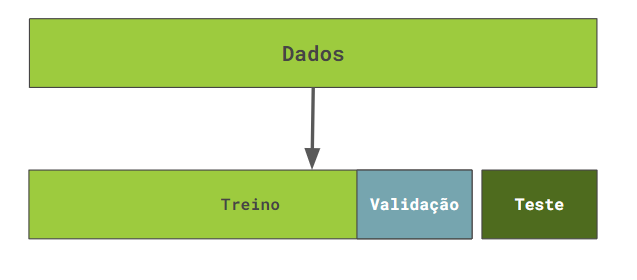

O conjunto de teste possibilita que apliquemos uma "prova final" ao modelo escolhido, avaliando como ele se comporta com dados não vistos anteriormente. Enquanto isso, **usamos o conjunto de *treino* e *validação* para avaliar diferentes modelos e hiperparâmetros, até chegar à decisão de qual modelo será escolhido**.

Para separarmos a base de dados nestes três conjuntos, podemos fazer uma combinação de chamada da função `train_test_split` duas vezes. Na primeira chamada, iremos criar o conjunto de teste. Na segunda chamada da função, iremos separar o restante dos dados entre os conjuntos de treino e validação. 

Em nosso exemplo, iremos indicar que queremos separar 15% dos dados para teste usando o parâmetro `test_size`. O restante será separado para treino e validação com os parâmetros default da função.

In [5]:
from sklearn.model_selection import train_test_split

# reserving 15% of data for testing
x, x_test, y, y_test = train_test_split(x, y, test_size=.15, stratify=y, random_state=5)

# splitting the remaining data for training and validation
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=5, stratify=y)

In [6]:
print(f'Treino:\nX:${x_train.shape}\nY:{len(y_train)}\n')
print(f'Validação:\nX:${x_val.shape}\nY:{len(y_val)}\n')
print(f'Teste:\nX:${x_test.shape}\nY:{len(y_test)}\n')
print(f'Total: ${data.shape}')

Treino:
X:$(34440, 10)
Y:34440

Validação:
X:$(11481, 10)
Y:11481

Teste:
X:$(8104, 10)
Y:8104

Total: $(54025, 11)


In [7]:
print(pd.DataFrame(y).value_counts(normalize=True))
print(pd.DataFrame(y_train).value_counts(normalize=True))
print(pd.DataFrame(y_val).value_counts(normalize=True))
print(pd.DataFrame(y_test).value_counts(normalize=True))

inadimplente
0               0.912698
1               0.087302
dtype: float64
inadimplente
0               0.912689
1               0.087311
dtype: float64
inadimplente
0               0.912725
1               0.087275
dtype: float64
inadimplente
0               0.912759
1               0.087241
dtype: float64


Analisando novamente o modelo com os parâmetros padrão, mas agora usando somente os dados de treino para o fitting.

In [8]:
model = DecisionTreeClassifier(random_state=5)
model.fit(x_train, y_train)
print(f'Acurácia (dados de treino): {model.score(x_train, y_train)}')
print(f'Acurácia (dados de validação): {model.score(x_val, y_val)}')

Acurácia (dados de treino): 1.0
Acurácia (dados de validação): 0.8479226548210086


É possível novamente verificar o provável overfitting do dados, pois a acurácia continua sendo 100% ao validar o modelo com os dados de treino novamente. Para tornar o modelo mais genérico, vamos limitar a profundidade máxima da árvore (parâmetro `max_depth`).

In [9]:
model = DecisionTreeClassifier(max_depth=10, random_state=5)
model.fit(x_train, y_train)
print(f'Acurácia (dados de treino): {model.score(x_train, y_train)}')
print(f'Acurácia (dados de validação): {model.score(x_val, y_val)}')

Acurácia (dados de treino): 0.9206445993031359
Acurácia (dados de validação): 0.905496036930581


Agora a acurácia dos dados de treino diminuiu, no entanto, a acurácia da validação aumentou e ambas as acurácias estão com valores próximos, indicando que o modelo aprendeu "melhor" e não simplesmente decorou as entradas de treino. 

### Avaliando o modelo

A acurácia é apenas uma das métricas possíveis para validar um modelo. Ela sozinha não consegue informar se o modelo está bom de fato - ela só indica o quão bem o modelo acerta. Em uma classificação binária (nesse caso, adimplentes e inadimplentes), a acurácia não indica se ela acerta bem tanto em classificar em adimplentes (verdadeiros positivos) quanto em classificar em inadimplentes (verdadeiros negativos) - ela nos informa a média da taxa de todos os acertos.

Podemos ter uma avaliação melhor do modelo utilizando uma matriz de confusão, que compara as classificações reais com as previsões do modelo.

Vamos criar uma matriz de confusão e fazer uma análise dos dados de validação.

In [10]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_val)
confusion_mat = confusion_matrix(y_val, y_predicted)
print(confusion_mat)

[[10354   125]
 [  960    42]]


Podemos tornar a visualização mais agradável utilizando a classe `ConfusionMatrixDisplay`.

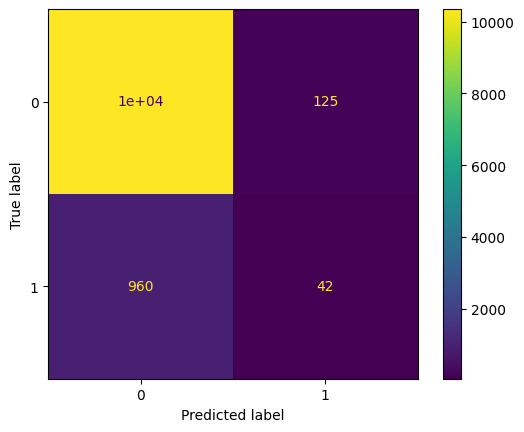

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_mat_plot = ConfusionMatrixDisplay(confusion_mat)
confusion_mat_plot.plot();

Podemos melhorar um pouco mais a visualização dando nomes mais específicos para cada tick nas labels, ao invés de 0 e 1. Podemos fazer isso com o parâmetro `display_labels`.

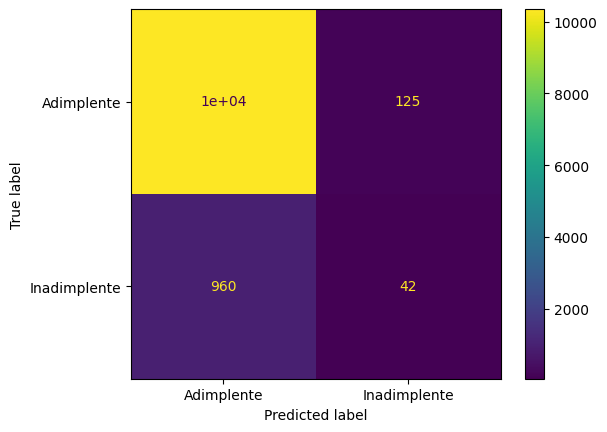

In [12]:
confusion_mat_plot = ConfusionMatrixDisplay(confusion_mat, display_labels=['Adimplente', 'Inadimplente'])
confusion_mat_plot.plot();

Entendendo a matriz de confusão:

- Vamos assumir como "positivo" (1) a classificação "**in**adimplente" e como "negativo" (0), a classificação "adimplente", pois na base de dados a variável alvo são os inadimplentes, então 1 significa presença e 0 significa ausência desse atributo;

- O primeiro quadrante indica os **Verdadeiros Negativos (TN - True Negative)**, ou seja, a quantidade de pessoas que eram adimplentes (0) e que o modelo classificou corretamente como adimplentes (0);

- O segundo quadrante indica os **Falsos Positivos (FP - False Positive)**, ou seja, a quantidade de pessoas que eram adimplentes (0) e que o modelo classificou *incorretamente* como inadimplentes (1). O modelo atribuiu positivo, mas isso é falso;

- O terceiro quadrante indica os **Falsos Negativos (FN - False Negative)**, ou seja, a quantidade de pessoas que eram inadimplentes (1) e que o modelo classificou *incorretamente* como adimplentes (0). O modelo atribuiu negativo, mas isso é falso;

- O quarto quadrante indica os **Verdadeiros Positivos (TP - True Positive)**, ou seja, a quantidade de pessoas que eram inadimplentes (1) e que o modelo classificou corretamente como inadimplentes (1).

- A diagonal principal representa os acertos do modelo, enquanto a secundária representa os erros. O melhor cenário é uma diagonal principal com valores altos e uma diagonal secundária com valores baixos.

Analisando a matriz de confusão, podemos ver que o modelo acertou muito bem na classificação dos clientes adimplentes (alto valor de TN, baixo valor de FP). No entanto, na classificação dos clientes *inadimplentes*, o modelo **não** está se saindo bem, pois o valor de FN está muito mais alto que o de TP (de um universo de mais de 1000 inadimplentes, o modelo conseguiu acertar **somente 42**). Isso indica que o modelo está sendo tendencioso para o lado da classificação de adimplentes.

Aqui, conseguimos ver que a acurácia sozinha não conta toda a história, e que o melhor é adicionarmos outras métricas à nossa avaliação do modelo.

Para finalizar, é possível usar somente a `ConfusionMatrixDisplay` sem precisar calcular uma matriz de confusão com a função `confusion_matrix`:

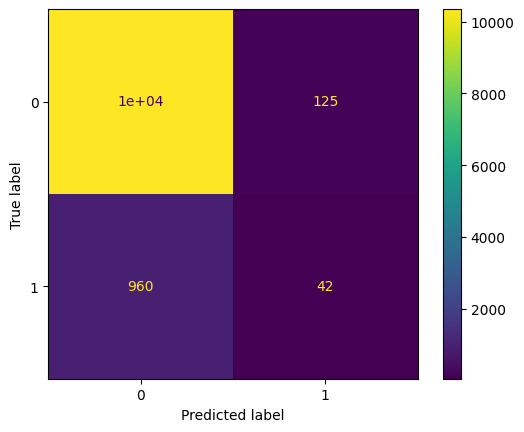

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_predicted);

## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

Observando a matriz de confusão, podemos entender como são calculadas as métricas de acurácia, precisão e recall (o recall também é chamado de "sensibilidade").

Todas essas métricas geram resultados entre 0 e 1. Resultados mais próximos de 1 representam um bom desempenho.

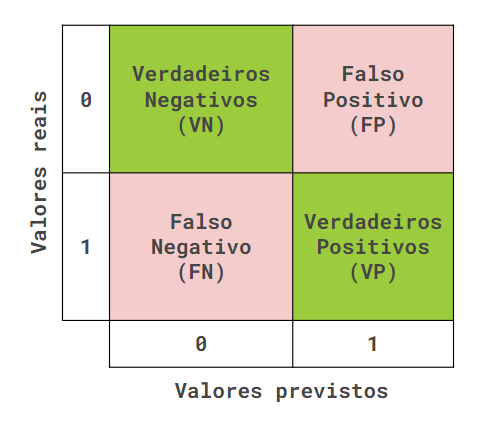

#### Acurácia 

A acurácia já foi tratada acima. Usando a matriz de confusão, ela pode ser medida pela divisão entre a **soma da diagonal principal com a soma de todos os quadrantes**.

Essa métrica pode ser obtida por meio do próprio modelo, como foi visto, utilizando o método `score`. Mas ela também pode ser obtida com a função `accuracy_score`:

In [14]:
from sklearn.metrics import accuracy_score

print(f'Acurácia (método score): {model.score(x_val, y_val)}')
print(f'Acurácia (accuracy_score): {accuracy_score(y_val, y_predicted)}')

Acurácia (método score): 0.905496036930581
Acurácia (accuracy_score): 0.905496036930581


#### Precisão

A precisão representa quão bem o modelo está acertando a característica que queremos verificar, ou seja, leva em conta somente o **acertos nas previsões positivas** (o acerto na classificação dos inadimplentes, no nosso caso). Neste caso, o número de falsos positivos afeta a precisão.

Pela matriz de confusão, podemos obter a precisão dividindo o TP pela soma da segunda coluna (FP+TP).

Fórmula:

$precisao = \frac {TP}{TP + FP}$

In [15]:
from sklearn.metrics import precision_score

precision_score(y_val, y_predicted)

0.25149700598802394

#### Recall (sensibilidade)

O recall vai olhar para a proporção de acertos positivos do modelo, porém em comparação com o universo dos valores positivos reais (de todos os que de fato eram inadimplentes, quantos o modelo acertou). A quantidade de falsos negativos, neste caso, prejudica a métrica de recall.

Pela matriz de confusão, é a divisão de TP pela soma da segunda *linha* (FN+TP).

Fórmula: 

$recall = \frac {TP}{TP + FN}$

In [16]:
from sklearn.metrics import recall_score

recall_score(y_val, y_predicted)

0.041916167664670656

Pelos valores de precisão e recall, podemos novamente verificar que o modelo não está indo bem, pois ambos estão mais próximos de zero (destaque para o recall: 0.04).

Para o nosso cliente, o mais prejudicial é tomar prejuízo, ou seja, alugar para um potencial cliente inadimplente. Com isso, **a métrica mais importante para *nosso* problema é o recall**.

#### F1 Score

Essa métrica é um equilíbro entre precisão e recall, levando em conta ambos. Sua fórmula é uma média harmônica dessas duas outras métricas:

$F1 = 2 * \frac {precisao * recall} {precisao + recall}$

In [17]:
from sklearn.metrics import f1_score

f1_score(y_val, y_predicted)

0.0718562874251497

### Curva ROC (Receiver Operating Characteristic Curve)

É um gráfico construído a partir do recall, em conjunto com a taxa de falsos positivos ($\frac{FP}{TN + FP}$), que nos permite verificar se um modelo de classificação binária está conseguindo se sair bem na classificação.

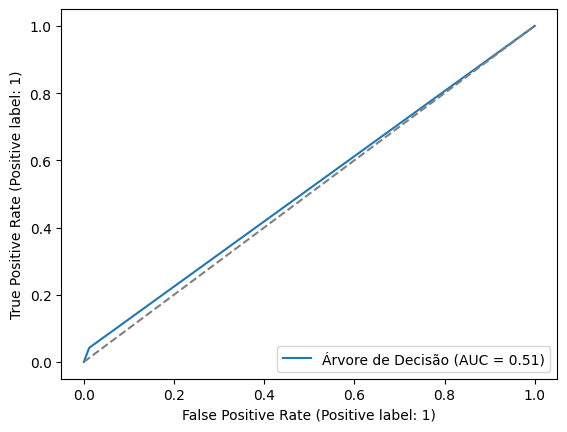

In [18]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(y_val, y_predicted, name='Árvore de Decisão')
# plotting a grey diagonal line for reference
# first [0, 1]: start and end points for the x coordinates
# second [0, 1]: start and end points for the y coordinates
# when combining both, I get points: (0, 0) and (1, 1)
display.ax_.plot([0, 1], [0, 1], linestyle="--", color="gray");

O gráfico mostra o Recall x Taxa de Falsos Positivos (será que é mesmo o Recall?). A inclinação da curva no gráfico nos ajuda a entender quão bem ou ruim está indo o modelo na diferenciação das classes. Curvas mais próximas de 1 no eixo y indicam um modelo bom (alta taxa de TP e baixa taxa FP), enquanto curvas mais próximas da diagonal indicam um modelo ruim, em que a classificação tem um comportamento aleatório. 

De acordo com o gráfico, temos mais uma comprovação de que o modelo está se saindo mal. 

O gráfico também traz uma nova métrica: AUC (Area Under the ROC Curve), um valor entre 0 e 1 (quanto mais próximo de 1, melhor; valor 0.5 representa aleatoriedade). 

Podemos também calcular somente a AUC: 

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_predicted)

0.5149937742608114

### Curva de precisão x recall (PR curve)

É outra forma de visualizar a performance do modelo, recomendada para conjuntos de dados muito desbalanceados (que é o nosso caso). Neste tipo de gráfico, os casos de verdadeiros negativos (TN) não são levados em conta, o que é vantajoso para casos em que o desbalanceamento está pesando nessa parte dos dados (que é o caso do nosso exemplo). O que é importante aqui é analisar os casos positivos (sejam eles verdadeiros ou falsos).

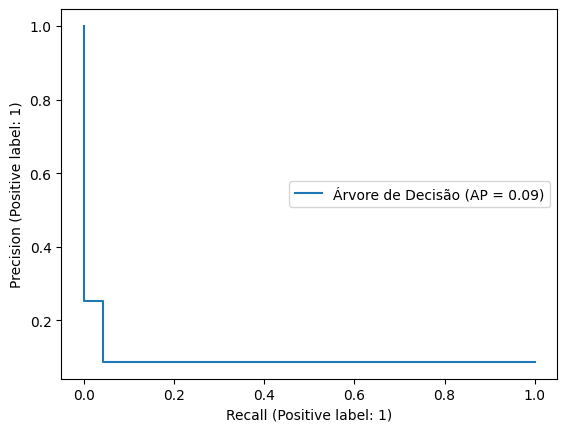

In [20]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(y_val, y_predicted, name='Árvore de Decisão')

# changing the position of the legend
ax = display.ax_
ax.legend(loc='center right');

Neste gráfico, devemos observar o canto superior direito (1, 1) e o inferior esquerdo (0, 0). O modelo é melhor quanto mais próximo sua curva estiver do ponto (1, 1) e pior quanto mais próximo estiver de (0, 0). Novamente, temos outra evidência de que o modelo é ruim, já que ele faz o oposto.

Uma nova métrica é apresentada pelo gráfico, a AP (Average Precision), que também varia de 0 a 1, sendo que quanto mais próximo de 1, melhor é o desempenho do modelo.

In [21]:
from sklearn.metrics import average_precision_score

average_precision_score(y_val, y_predicted)

0.09415820039056431

### Relatório de métricas

O scikit-learn possui uma função capaz de gerar um relatório com as principais métricas de classificação:

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



O relatório traz o valor das métricas levando em conta cada classe de forma independente. Então na linha 0 temos valores de precision, recall e f1-score para a classe 0 (adimplentes), e depois para a classe 1 (inadimplentes). A coluna de suporte informa a quantidade de amostras para cada classe (e consegue evidenciar como a base está em desequilíbrio, favorecendo mais a classe dos adimplentes).

A métrica de acurácia leva em conta todas as entradas. As duas últimas métricas são uma média para precision, recall e f1-score levando em conta as duas classes (média aritmética e média ponderada - levando em conta a quantidade de amostras de cada classe).

## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Observe que a validação cruzada é feita somente na parte dos dados reservada para treino+validação. A parte reservada para **testes** é separada **antes** e **não é alterada**.

Será gerado um modelo para cada uma dessas divisões e **a avaliação de desempenho será feita tirando a média da métrica de cada modelo**. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitigam o problema da escolha dos dados. (esse é um "número mágico"?)

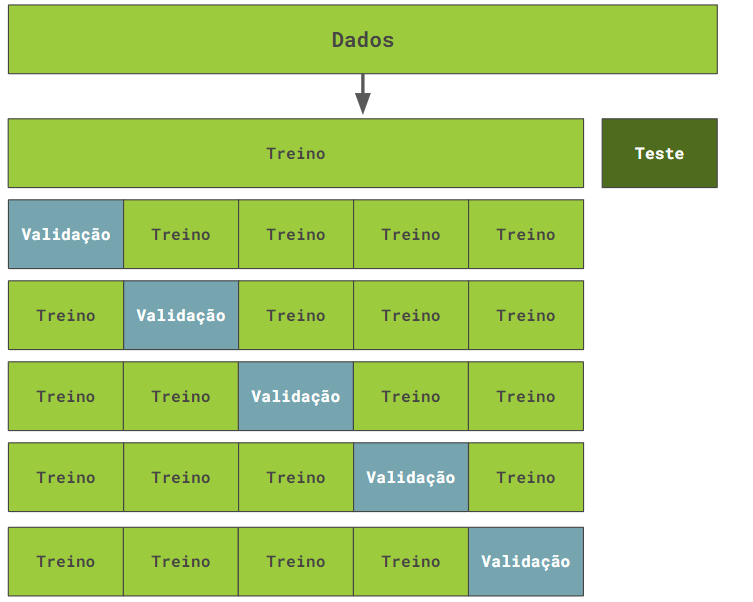

A validação cruzada não melhora o modelo. Somente nos ajuda a mitigar problemas de um acaso gerar uma métrica muito boa ou muito ruim com os dados que separamos para treinamento e validação, o que poderia nos levar a tomar decisões erradas na configuração do modelo.

O KFold é uma das maneiras que podemos dividir os dados para serem usados na validação cruzada.

Aplicando validação cruzada, usando KFold para divisão dos dados e uma árvore de decisão como modelo.

Por padrão, o KFold divide os dados em 5 partes (parâmetro `n_splits`), com a opção de primeiro embaralhar todas as linhas antes da divisão (parâmetro `shuffle` - `False` por padrão).

In [23]:
from sklearn.model_selection import cross_validate, KFold

model = DecisionTreeClassifier(max_depth=10, random_state=5)
kf = KFold(random_state=5, shuffle=True)

# running cross validation and viewing the results
cv_results = cross_validate(model, x, y, cv=kf)
cv_results

{'fit_time': array([0.60630012, 0.46356654, 0.5467329 , 0.51401329, 0.49623585]),
 'score_time': array([0.01256371, 0.01220751, 0.00798798, 0.00836372, 0.00121951]),
 'test_score': array([0.9127926 , 0.90733885, 0.90755662, 0.91343641, 0.89993467])}

O resultado é um dicionário, com informações sobre o tempo que levou o fit, o tempo que levou para calcular as métricas, e o valor da **acurácia**, para cada modelo. Com esse resultado, podemos extrair uma média da acurácia e um intervalo de confiança:

In [24]:
r_mean = cv_results['test_score'].mean()
r_std = cv_results['test_score'].std()
print(f'Intervalo de confiança da acurácia: [{r_mean - 2 * r_std}, {min(1, r_mean + 2 * r_std)}]')

Intervalo de confiança da acurácia: [0.8984965853624826, 0.9179270734965496]


### Validação cruzada com recall

A função `cross_validate` possibilita gerar outras métricas, dentre elas o recall, por meio do parâmetro `scoring`.

In [25]:
# defining a function to print the confidence interval
def confidence_interval(results):
    r_mean = results['test_score'].mean()
    r_std = results['test_score'].std()
    print(f'Intervalo de confiança da métrica: [{r_mean - 2 * r_std}, {min(1, r_mean + 2 * r_std)}]')

In [26]:
# calculating the recall
cv_results = cross_validate(model, x, y, cv=kf, scoring='recall')
confidence_interval(cv_results)

Intervalo de confiança da métrica: [0.013113058713756235, 0.02873009548220205]


In [27]:
cv_results

{'fit_time': array([0.51306462, 0.49015689, 0.44904447, 0.43134046, 0.45506954]),
 'score_time': array([0.01002789, 0.00993824, 0.01422095, 0.00946426, 0.00879741]),
 'test_score': array([0.02642008, 0.01856436, 0.0196802 , 0.0156658 , 0.02427746])}

#### Desafio

Como desafio, construa um código para gerar o intervalo de confiança para cada uma das métricas com a utilização da validação cruzada:

- Acurácia
- Recall
- Precisão
- F1-score

In [28]:
# checking the names for each metric
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [29]:
cv_results = cross_validate(model, x, y, cv=kf, scoring=['accuracy', 'recall', 'precision', 'f1'])
cv_results

{'fit_time': array([0.54346132, 0.44833255, 0.46305752, 0.4139061 , 0.41126394]),
 'score_time': array([0.03244686, 0.03253984, 0.02519703, 0.02646279, 0.03352404]),
 'test_accuracy': array([0.9127926 , 0.90733885, 0.90755662, 0.91343641, 0.89993467]),
 'test_recall': array([0.02642008, 0.01856436, 0.0196802 , 0.0156658 , 0.02427746]),
 'test_precision': array([0.23809524, 0.20547945, 0.23529412, 0.22641509, 0.21875   ]),
 'test_f1': array([0.04756243, 0.03405221, 0.03632236, 0.02930403, 0.04370447])}

In [30]:
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    r_mean = cv_results[metric].mean()
    r_std = cv_results[metric].std()
    print(f'Intervalo de confiança para {metric}: [{r_mean - 2 * r_std}, {min(1, r_mean + 2 * r_std)}]')

Intervalo de confiança para test_accuracy: [0.8984965853624826, 0.9179270734965496]
Intervalo de confiança para test_recall: [0.013113058713756235, 0.02873009548220205]
Intervalo de confiança para test_precision: [0.20115287193073664, 0.24846068892394899]
Intervalo de confiança para test_f1: [0.024988445722487554, 0.05138975581383043]


### Estratificando os dados

Identificando a propoção do desbalanceamento dos dados da variável alvo:

In [31]:
# normalize will return the proportion of each classe in relation to all classes (percentage)
data['inadimplente'].value_counts(normalize=True)

0    0.912707
1    0.087293
Name: inadimplente, dtype: float64

O KFold não possui um critério de estratificação dos dados, algo que tínhamos à disposição quando usamos o `train_test_split` (parâmetro `stratify`). Se quisermos manter a proporção da variável alvo na divisão dos dados, podemos utilizar outra classe: `StratifiedKFold`

In [32]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(shuffle=True, random_state=5)
cv_results = cross_validate(model, x, y, cv=skf, scoring='recall')
confidence_interval(cv_results)

Intervalo de confiança da métrica: [0.020982117617345714, 0.03588819100560377]


## <font color='dark'>Balanceamento de dados</h1>

### Oversampling

São estratégias para **aumentar** a quantidade de dados (samples) para classes que estão em menor quantidade em uma base de dados desbalanceada. 

Uma abordagem simples é duplicar aleatoriamente a quantidade de elementos até chegar em um nível balanceado. 

Outra abordagem, mais elaborada, é utilizar a técnica chamada SMOTE (Synthetic Minority Oversampling Technique), cujo algoritmo consegue criar novos dados sintéticos para as classes que estão em menor quantidade (envolve escolher pontos aleatórios dessa classe, olhar para os k-vizinhos mais próximos e encontrar valores que estejam na intersecção entre o ponto e algum vizinho). 

In [33]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
x_balanced, y_balanced = oversampler.fit_resample(x, y)

In [34]:
y.value_counts(normalize=True)

0    0.912698
1    0.087302
Name: inadimplente, dtype: float64

In [35]:
y_balanced.value_counts(normalize=True)

0    0.5
1    0.5
Name: inadimplente, dtype: float64

Com os dados agora balanceados para as duas classes, podemos avaliar novamente o modelo:

In [36]:
model = DecisionTreeClassifier(max_depth=10, random_state=5)
skf = StratifiedKFold(shuffle=True, random_state=5)
cv_results = cross_validate(model, x_balanced, y_balanced, cv=skf, scoring='recall')
confidence_interval(cv_results)

Intervalo de confiança da métrica: [0.7140468908114277, 0.7420041843653435]


### Pipeline para validação

Os passos executados anteriormente balancearam todos os dados em x e y, e aí então fizemos a validação cruzada utilizando estes dados. Esse não é o cenário ideal, pois em um teste real as entradas não estarão sempre balanceadas. Ou seja, no momento de fazer a validação do modelo, não deveríamos ter uma base de validação balanceada - deveríamos balancear somente os dados de treino.

Para conseguir executar esses passos numa sequência correta, podemos utilizar um pipeline, em que informamos ao `cross_validate` a ordem em que algumas ações devem acontecer, de modo que o balanceamento ocorra com os dados de treino, e a validação utilize os dados desbalanceados.

In [37]:
# using an alias to diferentiate the imblearn pipeline from the scikit-learn pipeline
from imblearn.pipeline import Pipeline as imbpipeline

O `Pipeline` do `imblearn` espera como parâmetro uma lista de tuplas, sendo que cada tupla representa um passo do pipeline. O primeiro elemento da tupla é um nome para aquele passo e o segundo elemento é alguma classe que tenha os métodos de fit, transform ou sample. Quando é passado um resampler como o SMOTE, **o oversampling é aplicado somente durante o fit do modelo**, e não durante o predict. Cada passo é executado na ordem listada. Então, podemos criar um pipeline que primeiro aplica o oversampling e depois treina o modelo com os dados balanceados.

In [38]:
model = DecisionTreeClassifier(max_depth=10, random_state=5)
pipeline = imbpipeline([
    ('oversampling', SMOTE()),
    ('arvore_decisao', model)
])

O pipeline é passado como o primeiro parâmetro para o cross_validate. Como agora o oversample ocorre dentro do pipeline, podemos passar o x e y originais.

In [39]:
skf = StratifiedKFold(shuffle=True, random_state=5)
cv_results = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
confidence_interval(cv_results)

Intervalo de confiança da métrica: [0.24276523266314412, 0.30200704388643085]


### Undersampling

De modo contrário do oversampling, o undersampling reduz a quantidade de dados da classe que possui mais dados, ou seja, elimina dados do conjunto de dados a ser utilizado para validar o modelo. 

O undersampling também pode seguir uma estratégia aleatória de remoção de dados, ou seguir alguma técnica mais refinada, com algum critério para escolha dos dados a serem removidos. Dentre essas técnicas, existe a Near Miss. Na biblioteca `imblearn`, o `NearMiss` possui 3 versões diferentes, cada uma com seu critério de seleção, e utilizaremos a terceira (novamente, um número mágico).

In [40]:
from imblearn.under_sampling import NearMiss

pipeline = imbpipeline([
    ('undersampling', NearMiss(version=3)),
    ('arvore_decisao', model)
])
cv_results = cross_validate(pipeline, x, y, cv=skf, scoring='recall')

In [41]:
confidence_interval(cv_results)

Intervalo de confiança da métrica: [0.6289255984880933, 0.699569642809412]


O intervalo de confiança utilizando o **Near Miss gerou valores mais altos**. Então utilizaremos o Near Miss em nosso modelo. Vamos finalmente testar o modelo escolhido, utilizando os dados de teste que deixamos separados.

### Testando o modelo

Vamos para a etapa de teste do modelo com os dados de teste, que são aqueles dados até agora desconhecidos ao modelo.

Na etapa anterior, utilizamos o pipeline para não balancear os dados de validação, pois o interesse era em validar o modelo e ver como ele performava. Nesta etapa, podemos treinar o modelo com todos os dados balanceados (tando os de treino quanto os de validação).

In [42]:
y_test.value_counts()

0    7397
1     707
Name: inadimplente, dtype: int64

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



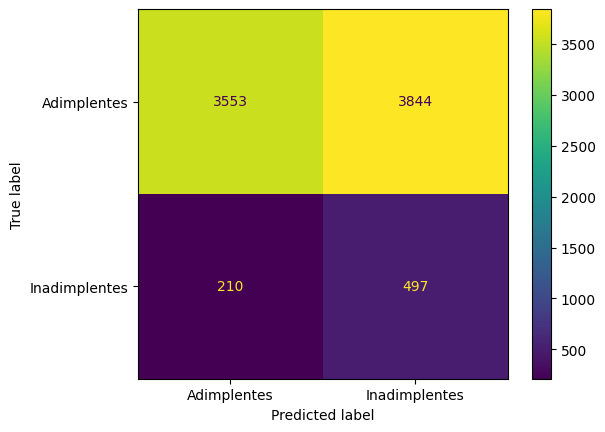

In [43]:
undersample = NearMiss(version=3)
x_balanced, y_balanced = undersample.fit_resample(x, y)

chosen_model = DecisionTreeClassifier(max_depth=10, random_state=5)
chosen_model.fit(x_balanced, y_balanced)

# now we'll evaluate the model with x_test
y_pred = chosen_model.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Adimplentes', 'Inadimplentes'])

**Será que esse modelo ficou realmente bom? Eu não estou achando não...**

Houve uma melhora significativa na classificação de inadimplentes (aumento nos TP, recall mais alto), embora ainda pouco precisa (muitos FP). Isso impactou na classificação de adimplentes (o recall ficou quase .5)

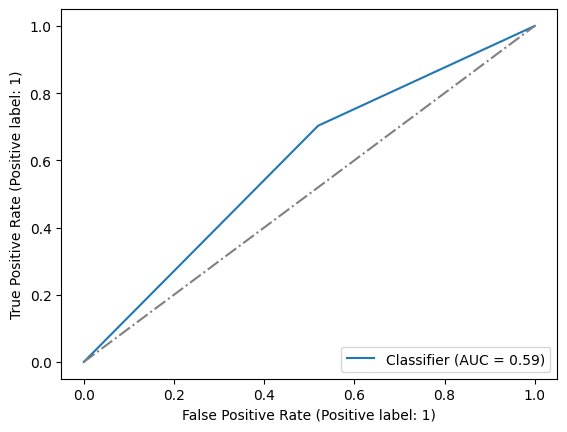

In [44]:
display = RocCurveDisplay.from_predictions(y_test, y_pred)
display.ax_.plot([0,1], [0, 1], linestyle='-.', color='gray')

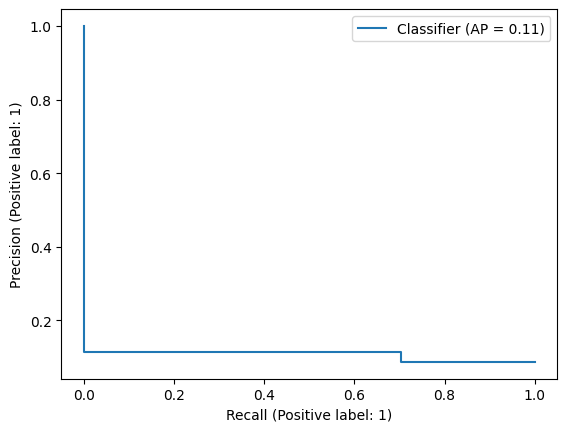

In [45]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
display.ax_.legend(loc='upper right')

### Desafio - SMOTEENN

Como desafio, utilize o algoritmo SMOTEENN, que combina o oversampling com SMOTE e undersampling com o ENN (Edited Nearest Neighbours), para balancear os dados e perceba os resultados obtidos pelo modelo usando o pipeline e a validação cruzada.

*Como uma dica, vasculhe a documentação do método [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html) para identificar como importar o método e como utilizá-lo.*

In [49]:
from imblearn.combine import SMOTEENN

pipeline = imbpipeline([
    ('sampling', SMOTEENN(random_state=5)),
    ('model', model)
])

cv_results = cross_validate(pipeline, x, y, cv=skf, scoring='recall')

In [52]:
confidence_interval(cv_results)

Intervalo de confiança da métrica: [0.2749485485324066, 0.3985537132911867]


Utilizando a combinação de over- e under-sampling com o SMOTEENN gerou um intervalo de confiança superior ao do SMOTE, porém, inferior ao do NearMiss.

- SMOTEENN: [0.2749485485324066, 0.3985537132911867]
- SMOTE: [0.24276523266314412, 0.30200704388643085]
- NearMiss: [0.6289255984880933, 0.699569642809412]